In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-05-24 19:00:09,185 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-24 19:00:09,187 - settings - Setting database.user to celiib
INFO - 2021-05-24 19:00:09,188 - settings - Setting database.password to newceliipass
INFO - 2021-05-24 19:00:09,190 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-05-24 19:00:09,193 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-24 19:00:09,226 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-05-24 19:00:09,910 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-24 19:00:09,916 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-24 19:00:09,922 - settings - Setting database.user to celiib
INFO - 2021-05-24 19:00:09,923 - settings - Setting database.password to newceliipass
INFO - 2021-05-24 19:00:09,923 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-24 19:00:09,924 - settings - Setting database.user to celiib
INFO - 2021-05-24 19:00:09,924 - settings - Setting database.password to newceliipass
INFO - 2021-05-24 19:00:09,925 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-24 19:00:10,497 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-24 19:00:10,708 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-24 19:00:10,713 - settings - Setting database.user to celiib
INFO - 2021-05-24 19:00:10,717 - settings - Setting database.password to newceliipass
INFO - 2021-05-24 19:00:10,726 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-24 19:00:11,326 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [5]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [32]:
(minnie.DecompositionAxon() & du.current_validation_segment_id_restriction
                  - du.current_validation_segment_id_exclude)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)
864691134988385914,0,0.25,30.00,5,0,0,5,=BLOB=,2077.7584374888374,281.93
864691134988385914,0,0.25,30.00,5,0,1,5,=BLOB=,1588.9282396646745,179.99
864691134988386682,0,0.25,30.00,7,0,0,5,=BLOB=,1976.8737012494769,285.1
864691135012395766,0,0.25,88.00,7,0,0,5,=BLOB=,1165.794402849451,281.24
864691135012395766,0,0.25,88.00,7,0,1,5,=BLOB=,4544.847887467138,646.18
864691135012395766,0,0.25,88.00,7,0,2,5,=BLOB=,0.0,13.17
864691135012541942,0,0.25,30.00,0,0,0,5,=BLOB=,63.25340906968667,215.9
864691135058565275,0,0.25,88.00,7,0,0,5,=BLOB=,76.14177537223479,63.85
864691135058565275,0,0.25,88.00,7,0,1,5,=BLOB=,64.54379752369694,58.96
864691135058565275,0,0.25,88.00,7,0,2,5,=BLOB=,317.1628696583318,86.6


In [ ]:
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron

In [65]:
((minnie.DecompositionAxon() & dict(split_index=1))  & du.current_validation_segment_id_restriction
                  - du.current_validation_segment_id_exclude)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)
864691134988385914,0,0.25,30.00,5,0,1,5,=BLOB=,1588.9282396646745,179.99
864691135012395766,0,0.25,88.00,7,0,1,5,=BLOB=,4544.847887467138,646.18
864691135058565275,0,0.25,88.00,7,0,1,5,=BLOB=,64.54379752369694,58.96
864691135058593947,0,0.25,88.00,7,0,1,5,=BLOB=,77.79308077921245,329.64
864691135256180143,0,0.25,88.00,7,0,1,5,=BLOB=,344.8542932470949,78.13
864691135307114822,0,0.25,88.00,7,0,1,5,=BLOB=,3376.9451970332084,349.7
864691135373402824,0,0.25,88.00,7,0,1,5,=BLOB=,154.26778555987323,82.77
864691135373686345,0,0.25,88.00,7,0,1,5,=BLOB=,539.2069657657138,361.74
864691135385216341,0,0.25,88.00,7,0,1,5,=BLOB=,3593.429943179674,418.72
864691135462735678,0,0.25,88.00,7,0,1,5,=BLOB=,3317.885410731405,537.21


In [44]:
((minnie.DecompositionAxon() & dict(axon_length=0))  & du.current_validation_segment_id_restriction
                  - du.current_validation_segment_id_exclude)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)
864691135012395766,0,0.25,88.00,7,0,2,5,=BLOB=,0.0,13.17
864691135865584005,0,0.25,30.00,7,0,1,5,=BLOB=,0.0,62.68
864691136451113215,0,0.25,30.00,7,0,0,5,=BLOB=,0.0,197.94
864691136664412413,0,0.25,30.00,3,0,1,5,=BLOB=,0.0,1.55


In [80]:
neuron_objs,split_idx = du.decomposition_with_spine_recalculation(864691134939999587)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 2


In [81]:
neuron_objs,split_idx

([<neuron.Neuron at 0x7f496e346fd0>, <neuron.Neuron at 0x7f496a696c50>],
 [0, 1])

In [74]:
neuron_obj = neuron_objs[0]

In [83]:
nviz.visualize_neuron(neuron_objs[1],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [33]:
n_obj_path = (minnie.Decomposition() & dict(segment_id=864691136451113215)).fetch1("decomposition")
neuron_obj = du.filepath_to_neuron_obj(n_obj_path)

Decompressing Neuron in minimal output mode...please wait


In [26]:
import classification_utils as clu
clu.axon_like_limb_branch_dict(neuron_obj,
                         verbose = True)

axon_like_limb_branch_dict = {'L0': array([ 1, 23, 24, 39, 42, 44]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 53, 54, 55, 57,
       59, 60, 61, 62, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]), 'L2': array([ 2,  9, 10]), 'L3': array([4]), 'L4': array([3, 4])}
downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 40000
Skipping a possible flip because the length is too long for threshold (70000): 133986.43087030586
Soma 0, limb L0, node 23 had 95122 non-axon downstream faces, 1877 axon downstream for a percentage of 0.9806492850441757
perc_non_axon for limb_L0_node_23,  = 0.9806492850441757
     Added 23 to non-axon list
Soma 0, limb L0, node 24 had 20918 non-axon downstream faces, 0.0 axon downstream for a percentage 

downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 40000
Soma 0, limb L2, node 2 had 55995 non-axon downstream faces, 0.0 axon downstream for a percentage of 1.0
perc_non_axon for limb_L2_node_2,  = 1.0
     Added 2 to non-axon list
Soma 0, limb L2, node 9 did not hae any downstream targets
Soma 0, limb L2, node 10 did not hae any downstream targets
total_non_axon_nodes = {2}
n = 9, upstream_node= 7
Not processing node 9 because spines were NONE and must_have_spine set to True
n = 10, upstream_node= 7
Not processing node 10 because there were no spines and  must_have_spine set to True
total_non_axon_nodes = set()
downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 40000
Soma 0, limb L3, node 4 had 73300 non-axon downstream faces, 0.0 axon downstream for a percentage of 1.0
perc_non_axon for limb_

{'L0': array([ 1, 39, 42, 44]),
 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 53, 54, 55, 57,
        59, 60, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 'L2': array([ 9, 10])}

In [29]:
neuron_obj[1][62].skeletal_length

109223.48063790842

In [24]:
nviz.plot_branches_with_spines(neuron_obj[1][62])

width = {'median_mesh_center': 301.04561377428917, 'no_spine_median_mesh_center': 301.04561377428917}, 
n_spines = 3,
 spine_density = 2.7466621485405986e-05
 spine_volume_density = 1500.7171600161253
skeleton_length (in microns) = 109.22348063790842
area = 236.87813481367886


limb_name = L1

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


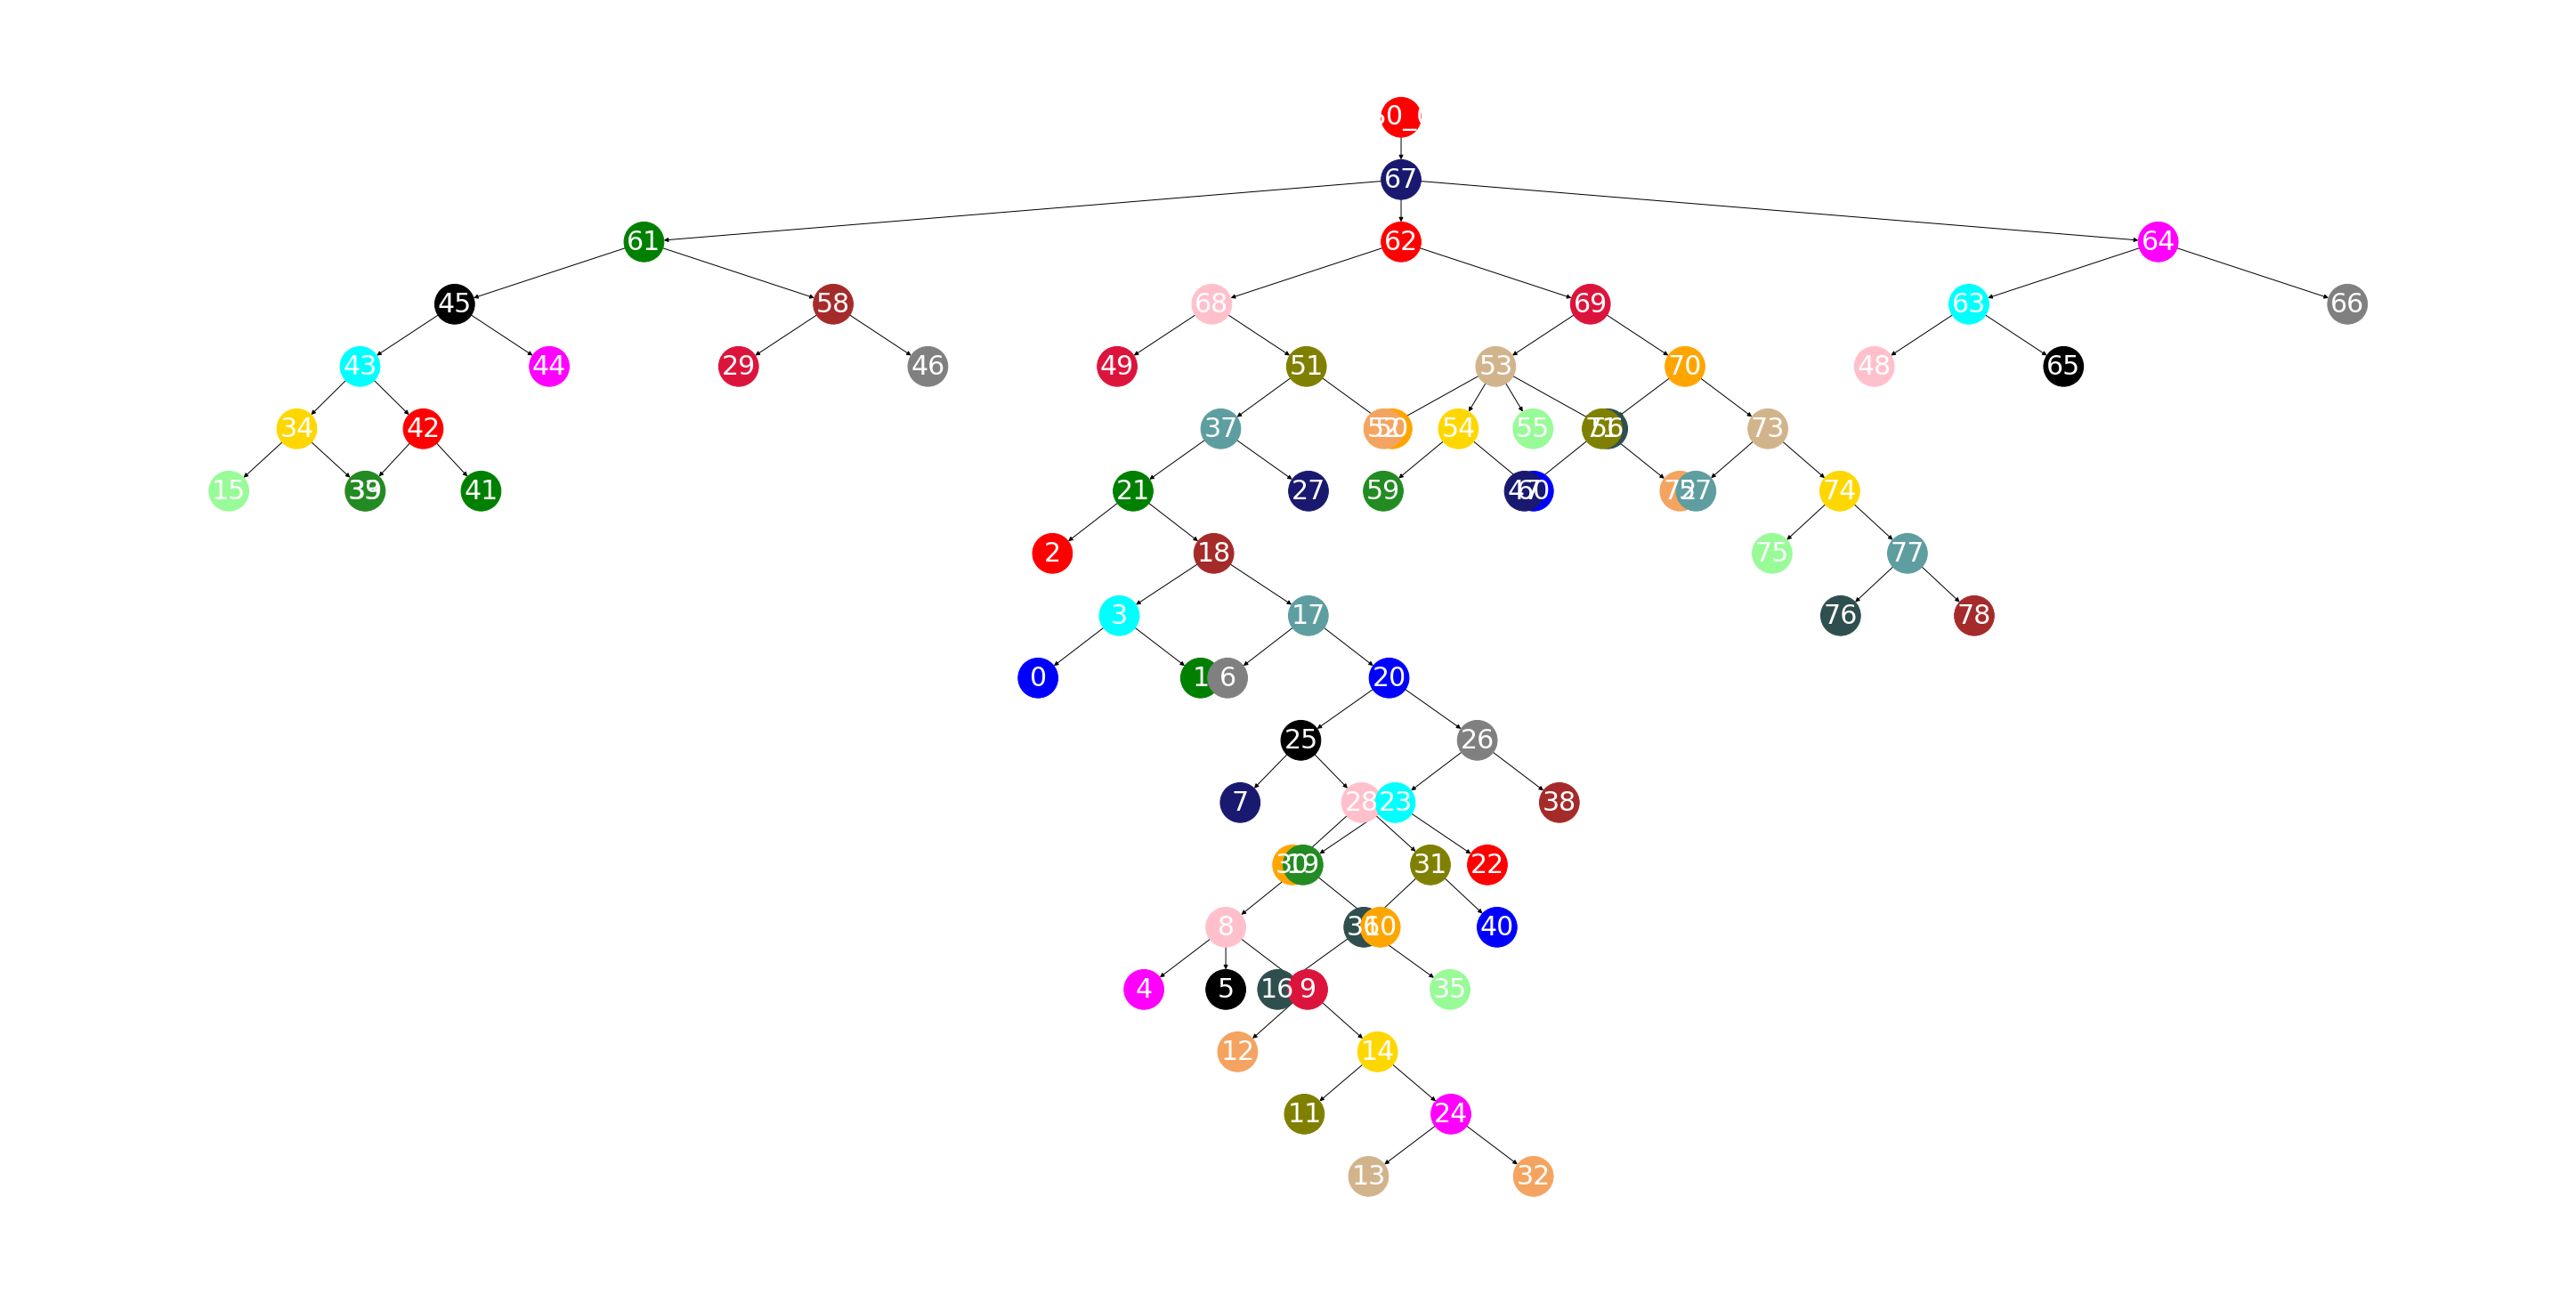

In [22]:
nviz.visualize_neuron_specific_limb(neuron_obj,1)

In [ ]:
du.

In [36]:
n_objs, split_indexes = du.decomposition_with_spine_recalculation(864691135012395766)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
**Using table __decomposition_axon for table_to_neuron_objs**


AttributeError: 'int' object has no attribute 'find'

864691135012395766

In [34]:
import neuron_visualizations as nviz
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [31]:
import classification_utils as clu
clu.axon_classification(neuron_obj,
                        plot_candidates=True,
                       plot_axons=True,
                            verbose=True,
                        plot_axon_like_segments=True
                           )


 Working on visualization type: mesh



Part 1: Axon like branchese 
{'L0': array([ 1, 39, 42, 44]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 53, 54, 55, 57,
       59, 60, 62, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]), 'L2': array([ 9, 10])}
Limb L0 soma angle: 15.97 
Limb L1 soma angle: 147.73 
Limb L2 soma angle: 130.28 
Limb L3 soma angle: 88.5 
Limb L4 soma angle: 72.9 

Part 2: possible_axon_limbs = [1, 2, 3, 4]

Phase 2: Working on Limb L1
nodes_to_eliminate = [67]

Phase 2: Working on Limb L2
nodes_to_eliminate = [0]

Phase 2: Working on Limb L3
nodes_to_eliminate = [4]

Phase 2: Working on Limb L4
nodes_to_eliminate = [4]

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3--

Final Candidates

Limb 1
Candidate 0 (orange): array([33, 34, 39, 41, 42, 43, 44, 45, 46, 15, 29, 58, 61])
Candidate 1 (blue): array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 37,
       38, 40, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])
Candidate 2 (crimson): array([64, 65, 66, 48, 63])

Limb 2
Candidate 0 (cyan): array([1])
Candidate 1 (blue): array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

Limb 3
Candidate 0 (green): array([1])
Candidate 1 (sandybrown): array([0, 2, 3])

Limb 4
Candidate 0 (sandybrown): array([1])
Candidate 1 (sandybrown): array([0, 2, 3])
Part 3: axon_subgraph_candidates = {1: [[33, 34, 39, 41, 42, 43, 44, 45, 46, 15, 29, 58, 61], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 37, 38, 40, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62

({'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 37,
         38, 40, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 68, 69,
         70, 71, 72, 73, 74, 75, 76, 77, 78])},
 {'L0': array([39, 44]),
  'L1': array([33, 39, 41, 42, 44]),
  'L2': array([ 9, 10])})

In [19]:
import axon_utils as au
n_obj_axon = au.complete_axon_processing(neuron_obj,
                                         plot_high_fidelity_axon = True,
                                         plot_boutons_web=True,
                                        verbose=True)


Part 1: Axon like branchese 
{'L0': array([ 1, 39, 42, 44]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 53, 54, 55, 57,
       59, 60, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]), 'L2': array([ 9, 10])}
Limb L0 soma angle: 15.97 
Limb L1 soma angle: 147.73 
Limb L2 soma angle: 130.28 
Limb L3 soma angle: 88.5 
Limb L4 soma angle: 72.9 

Part 2: possible_axon_limbs = [1, 2, 3, 4]

Phase 2: Working on Limb L1
nodes_to_eliminate = [67]

Phase 2: Working on Limb L2
nodes_to_eliminate = [0]

Phase 2: Working on Limb L3
nodes_to_eliminate = [4]

Phase 2: Working on Limb L4
nodes_to_eliminate = [4]

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----


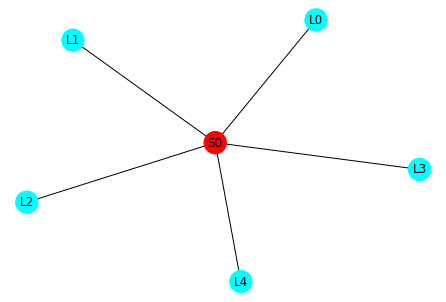

In [15]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [ ]:
"""
Pseudocode: 
1) Check if there are multiple somas associated

"""

In [ ]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [ ]:
job_idx = 0
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

In [ ]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")